# Regressão linear com Python


Exercício Aprendizagem de Máquina

Aluno: Fernando de Albuquerque / José Wellington






 # 1.0.  Definição do Problema: 
 
 ## Prever as notas dos alunos com base em diversas métricas
  Regressão Linear
 https://archive.ics.uci.edu/ml/datasets/Student+Performance
 Dataset com dados de estudantes

 Atributos para os conjuntos de dados student-mat.csv (curso de matemática) e student-por.csv (curso de idioma português):

 1 sexo - sexo do aluno (binário: '2' - feminino ou '1' - masculino)
 
 2 idade - idade do aluno (numérica: de 15 a 22)
 
 3 Endereço  tipo de endereço residencial do aluno (binário: 'U' - urbano ou 'R' - rural)
 
 4 famsize - tamanho da família (binário: '1' - menor ou igual a 3 ou '3' - maior que 3)
 
 5 Pstatus - status de coabitação dos pais (binário: '1' - morando juntos ou '0' - separados)
 
 6 Medu - escolaridade da mãe (numérico: 0 - nenhum, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)
 
 7 Fedu - educação do pai (numérico: 0 - nenhum, 1 - ensino fundamental (4a série), 2 - 5a a 9a série, 3 - educação secundária ou 4 - educação superior)
 
 8 Mjob - trabalho da mãe ('professor'= 1, 'serviços de saúde'=2, 'serviços civis' = 3(por exemplo, administrativos ou policiais), 'at_home' ou 'outro' = 4)
 
 9 Pjob - trabalho do pai ('professor' = 1, 'serviços de saúde' = 2, 'serviços civis'= 3 (por exemplo, administrativos ou policiais), 'at_home' ou 'outro' =4)
 
 10 motivo - motivo para escolher esta escola (próximo a 'casa' = 1, 'reputação' da escola' = 2, 'preferência do curso' = 3
 
 11 guardião - guardião do aluno (nominal: 'mãe', 'pai' ou 'outro')
 
 12 Tviagem - tempo de viagem entre casa e escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min a 1 hora ou 4 -> 1 hora)
 
 13 Testudo - tempo de estudo -  (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas ou 4 -> 10 horas)
 
 14 falhas - número de falhas de classe passada (numérico: n se 1 <= n <3, senão 4)
 
 15 escolas - suporte educacional extra (binário: sim ou não)
 
 16 famsup - suporte educacional familiar (binário: sim ou não)
 
 17 pagas - aulas extra pagas na disciplina (matemática ou português) (binário: sim ou não)
 
 18 atividades - atividades extracurriculares (binárias: sim ou não)
 
 19 creche - escola maternal frequentada (binária: sim ou não)
 
 20 superior - quer cursar o ensino superior (binário: sim ou não)
 
 21 internet - acesso à Internet em casa (binário: sim ou não)
 
 22 romântico - com um relacionamento romântico (binário: sim ou não)
 
 23 famrel - qualidade dos relacionamentos familiares (numérico: de 1 - muito ruim a 5 - excelente)
 
 24 tempo livre - tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)
 
 25 atividades - sair com os amigos (numérico: de 1 - muito baixo a 5 - muito alto)
 
 26 ConsAlcoolDir - consumo diário de álcool no trabalho (numérico: de 1 - muito baixo a 5 - muito alto)
 
 27 ConsAlcoolFimSem - consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)
 
 28 EstadoSaude - estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)
 
 29 faltas - número de faltas escolares (numérico: de 0 a 93)

 estas notas estão relacionadas com a disciplina, matemática ou português:
 30 N1 - primeira série do período (numérica: de 0 a 20)
 
 31 N2 - segunda série do período (numérica: de 0 a 20)
 
 32 NF - nota final (numérica: de 0 a 20, meta de saída)
 


 Vamos prever a nota final (grade) dos alunos


# Confira os dados
Nós conseguimos obter alguns dados do seu vizinho para os preços da habitação como um conjunto de csv, vamos preparar nosso ambiente com as bibliotecas que precisaremos e depois importar os dados!

# 1.1. Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1.2. Coletando os dados

In [2]:
Estudante = pd.read_csv('estudantesC.csv', sep=';') # lendo os dados

In [4]:
Estudante.head()

,Sexo,Idade,Endereco,TamFam,Pstatus,Medu,Pedu,Mjob,Pjob,motivo,...,RelFamiliar,TempLivre,SairAmigos,ConsAlcoolDir,ConsAlcoolFimSem,EstadoSaude,Faltas,N1,N2,NF
0,2,18,1,3,0,4,4,4,1,3,...,4,3,4,1,1,3,6,3,3,3
1,2,17,1,3,1,1,1,4,4,3,...,3,3,1,1,3,4,5,3,3,3
2,2,15,1,1,1,1,1,4,4,3,...,4,3,2,2,3,3,10,4,4,5
3,2,15,1,3,1,4,2,2,3,1,...,3,2,2,1,1,5,2,8,7,8
4,2,16,1,3,1,3,3,4,4,1,...,3,2,1,2,5,4,6,5,5,5


In [5]:
Estudante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
Sexo                395 non-null int64
Idade               395 non-null int64
Endereco            395 non-null int64
TamFam              395 non-null int64
Pstatus             395 non-null int64
Medu                395 non-null int64
Pedu                395 non-null int64
Mjob                395 non-null int64
Pjob                395 non-null int64
motivo              395 non-null int64
Guadiao             395 non-null int64
Tviagem             395 non-null int64
Testudo             395 non-null int64
Falhas              395 non-null int64
EscExtra            395 non-null int64
SupFamilia          395 non-null int64
AulasExtraPg        395 non-null int64
AtivExtraCur        395 non-null int64
Creche              395 non-null int64
QCursSuperior       395 non-null int64
InternetCasa        395 non-null int64
Namora              395 non-null int64
RelFamiliar         395 non-null int6

In [6]:
Estudante.describe()

,Sexo,Idade,Endereco,TamFam,Pstatus,Medu,Pedu,Mjob,Pjob,motivo,...,RelFamiliar,TempLivre,SairAmigos,ConsAlcoolDir,ConsAlcoolFimSem,EstadoSaude,Faltas,N1,N2,NF
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.526582,16.696203,1.222785,2.422785,0.896203,2.749367,2.521519,3.126582,3.407595,2.182278,...,3.784810,3.174684,2.787342,1.665823,2.600000,3.617722,7.334177,5.706329,5.536709,5.531646
std,0.499926,1.276043,0.416643,0.907379,0.305384,1.094735,1.088201,1.080128,0.880380,0.838290,...,0.985567,1.016297,1.276632,1.049400,1.427432,2.647322,8.016146,1.694972,2.045310,2.168273
min,1.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,4.000000,5.000000,4.000000
50%,2.000000,17.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,4.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,6.000000,6.000000,6.000000,6.000000
75%,2.000000,18.000000,1.000000,3.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,5.000000,11.000000,7.000000,7.000000,7.000000
max,2.000000,22.000000,2.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,21.000000,75.000000,10.000000,10.000000,10.000000


In [7]:
Estudante.columns

Index(['Sexo', 'Idade', 'Endereco', 'TamFam', 'Pstatus', 'Medu', 'Pedu',
       'Mjob', 'Pjob', 'motivo', 'Guadiao', 'Tviagem', 'Testudo', 'Falhas',
       'EscExtra', 'SupFamilia', 'AulasExtraPg', 'AtivExtraCur', 'Creche',
       'QCursSuperior', 'InternetCasa', 'Namora', 'RelFamiliar', 'TempLivre',
       'SairAmigos', 'ConsAlcoolDir', 'ConsAlcoolFimSem', 'EstadoSaude',
       'Faltas', 'N1', 'N2', 'NF'],
      dtype='object')

# 1.3. Análise exploratória de dados
Vamos criar alguns plots simples para verificar os dados.

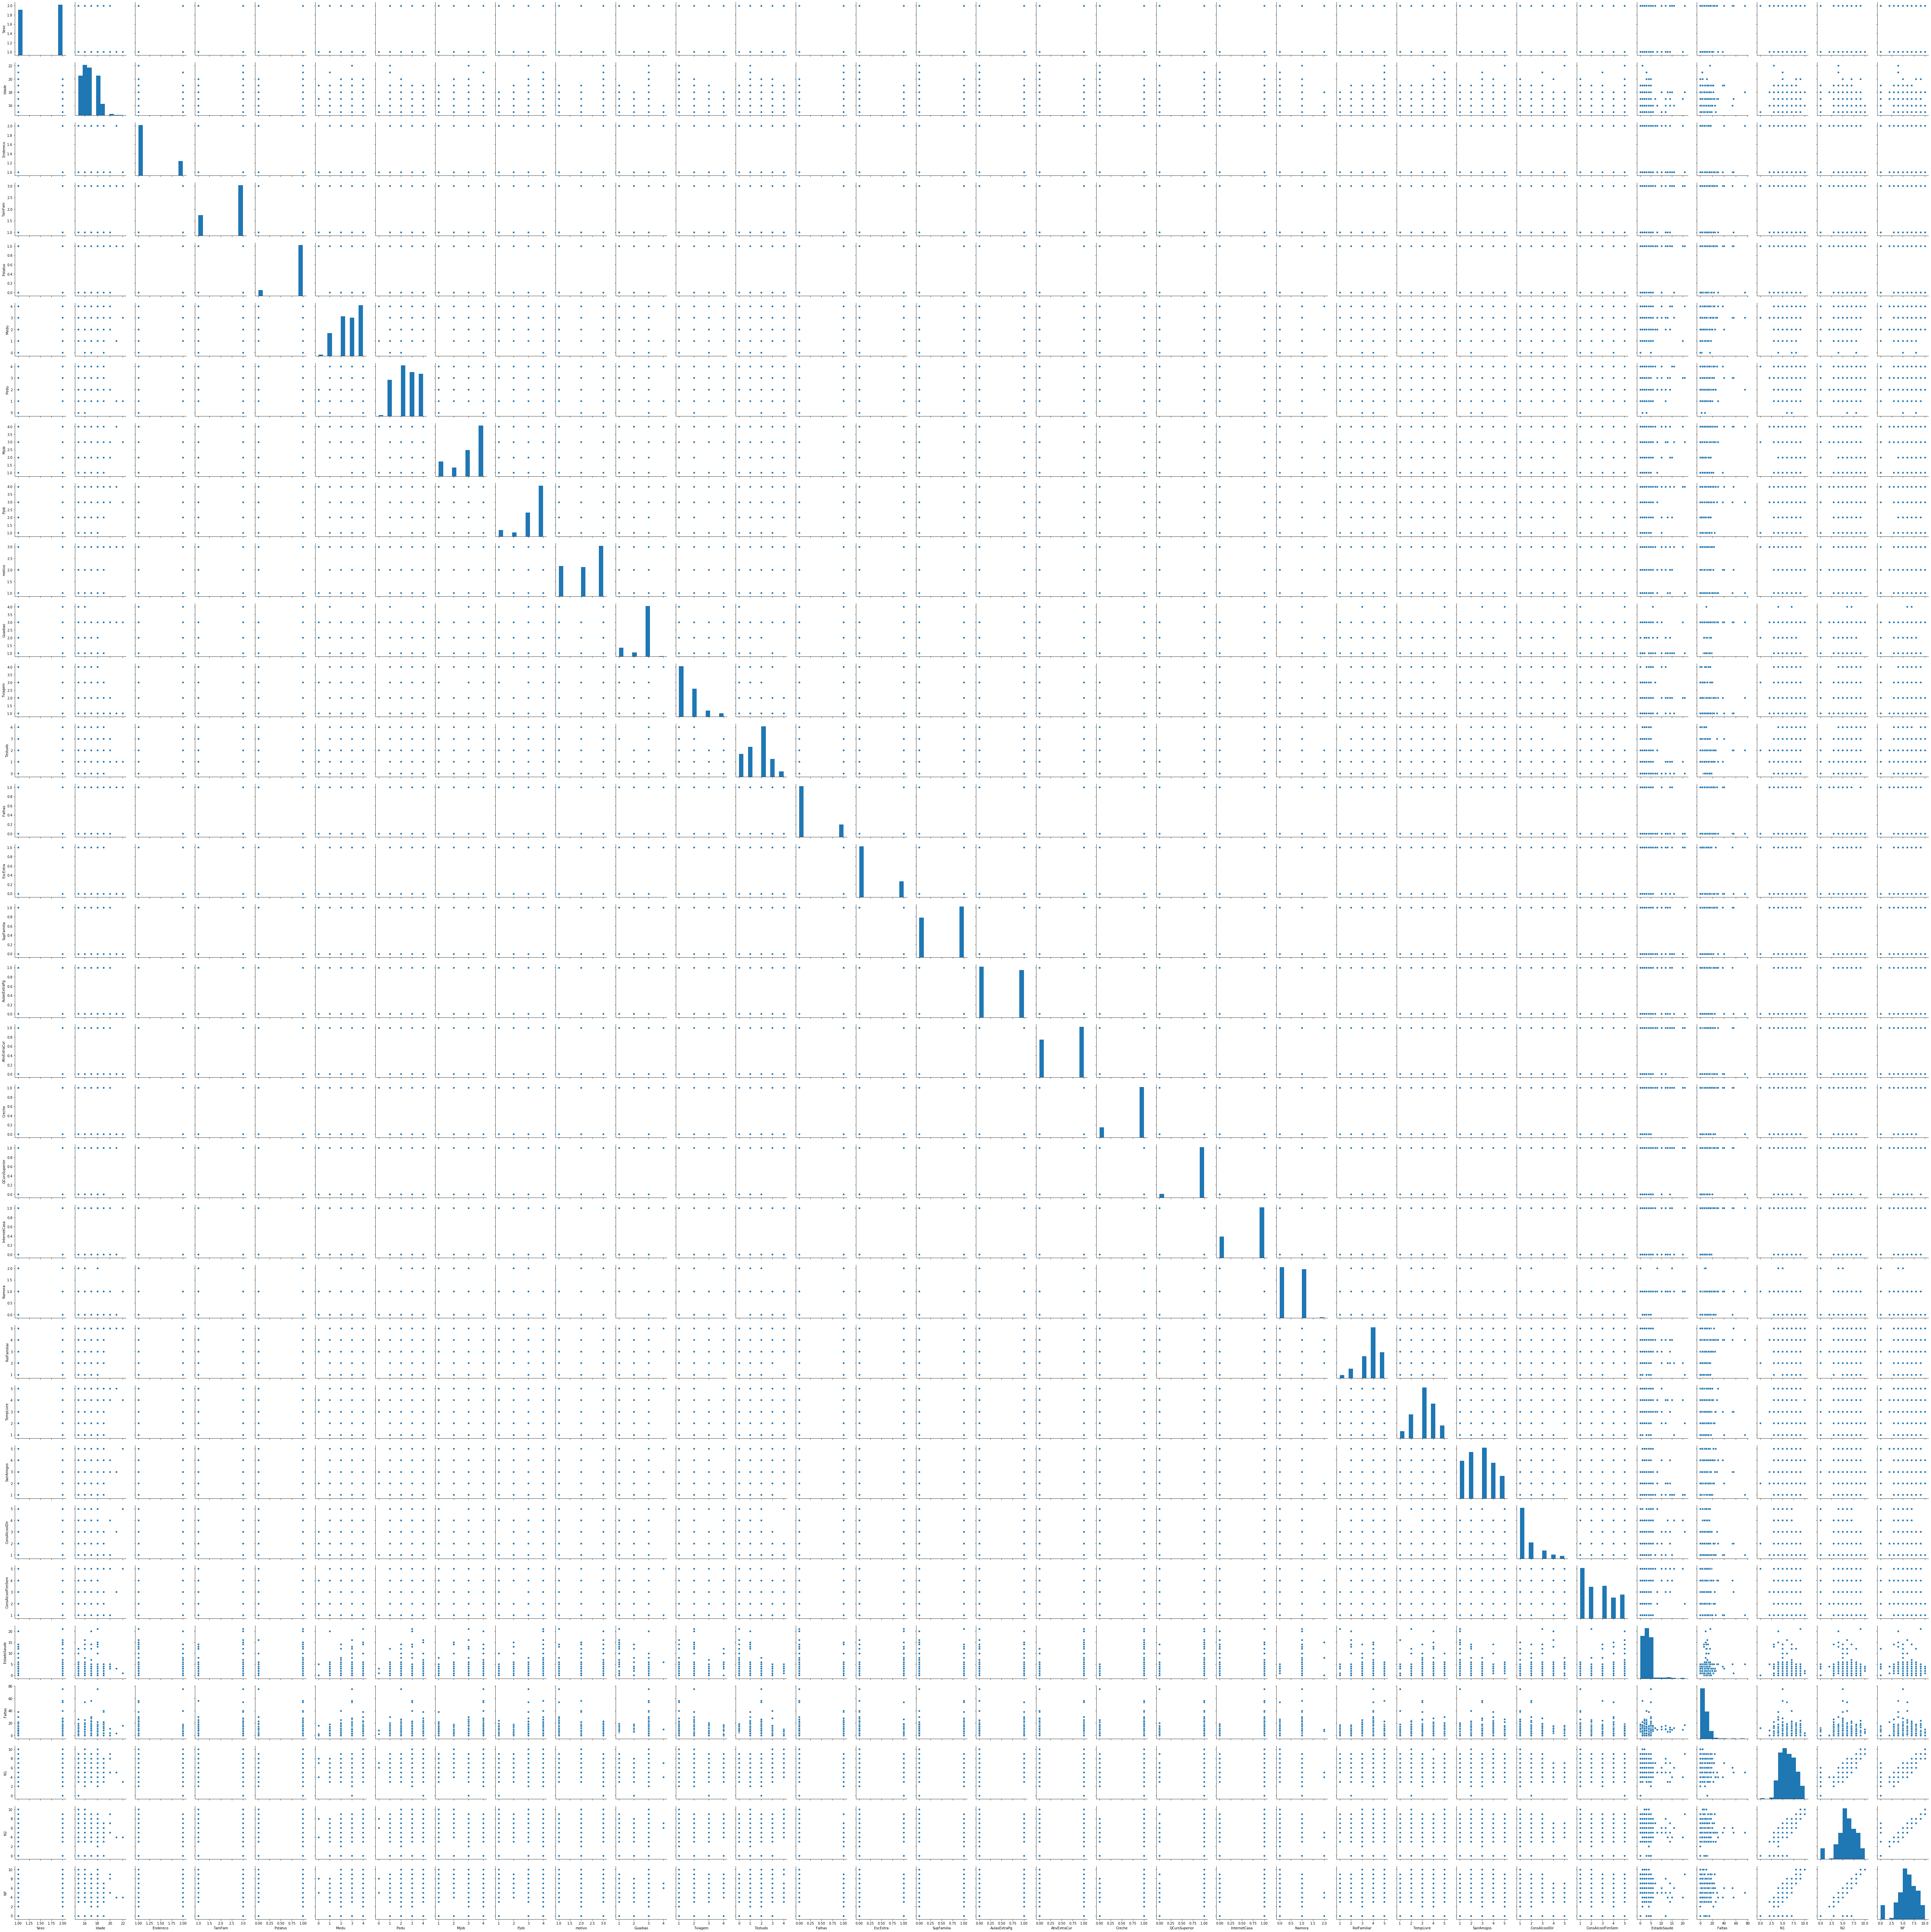

In [71]:
sns.pairplot(Estudante)

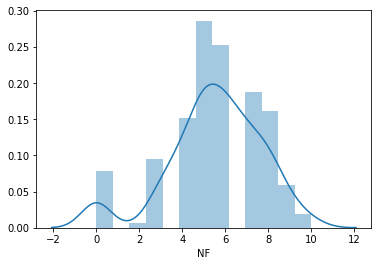

In [11]:
# Variavel target NF - Nota Final
sns.distplot(Estudante['NF'])

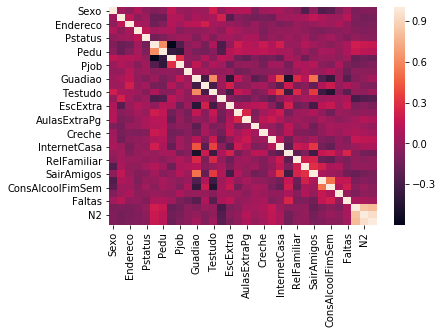

In [12]:
sns.heatmap(Estudante.corr())

# 1.4. Treinando um modelo de regressão linear

## Selecionando as variáveis

Vamos agora começar a treinar o modelo de regressão. 
Precisamos primeiro dividir nossos dados em uma matriz x que contém os recursos para treinar, 
e uma matriz y com a variável alvo, neste caso, a coluna NF (Nota Final). 

Vamos descartar a coluna "Adress" porque só tem informações de texto que o modelo de regressão linear não pode usar.

Arrays x e y

       'Sexo', 'Idade', 'Endereco', 'TamFam', 'FsJSJus', 'Medu', 'Pedu',
       'Mjob', 'Pjob', 'Motivo', 'Guadiao', 'Tviagem', 'Testudo', 'Falhas',
       'EscExtra', 'SupFamilia', 'AulasExtraPg', 'AtivExtraCur', 'Creche',
       'QCursSuperior', 'InternetCasa', 'Namora', 'RelFamiliar', 'TempLivre',
       'SairAmigos', 'ConsAlcoolDir', 'ConsAlcoolFimSem', 'EstadoSaude',
       'Faltas', 'N1', 'N2'
       
X  - Todas variaveis preditoras
x2  - N1 e N2  - # Nota 1 e Nota 2
x3  - Faltas   - # Faltas
x4  - Medu     - # Grau de educação da Mãe

y  -  NF         # Nota Final

In [13]:
X = Estudante[['Sexo', 'Idade', 'Endereco', 'TamFam', 'Pstatus', 'Medu', 'Pedu',
       'Mjob', 'Pjob', 'motivo', 'Guadiao', 'Tviagem', 'Testudo', 'Falhas',
       'EscExtra', 'SupFamilia', 'AulasExtraPg', 'AtivExtraCur', 'Creche',
       'QCursSuperior', 'InternetCasa', 'Namora', 'RelFamiliar', 'TempLivre',
       'SairAmigos', 'ConsAlcoolDir', 'ConsAlcoolFimSem', 'EstadoSaude',
       'Faltas', 'N1', 'N2']]
x2 = Estudante[['N1', 'N2']]
x3 = Estudante[['Faltas']]
x4 = Estudante[['Testudo']]
y = Estudante['NF']

# 2.1. Split de treino  X - Todas variáveis preditoras
Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. 
Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [16]:
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(395, 31) (276, 31) (119, 31) (276,) (119,)


# 2.2. Criando e treinando o modelo  - X - Todas variaveis

In [17]:
# Instanciar o Modelo
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

# 2.3. Avaliação modelo - X - Todas variaveis
Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [20]:
# Printando a intercepção. Quando y=0
print(lm.intercept_)

0.49937408988883636


In [16]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Sexo,-0.114938
Idade,-0.004403
Endereco,0.000149
TamFam,-0.025560
Pstatus,-0.102866
Medu,0.060939
Pedu,-0.043270
Mjob,-0.016565
Pjob,0.004096
motivo,-0.021513


# 2.4. Predições do modelo - X - Todas variaveis
Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

In [21]:
predictions = lm.predict(X_test)

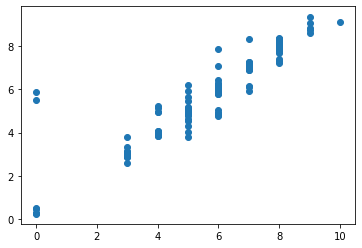

In [22]:
plt.scatter(y_test,predictions)

**Histograma residual**

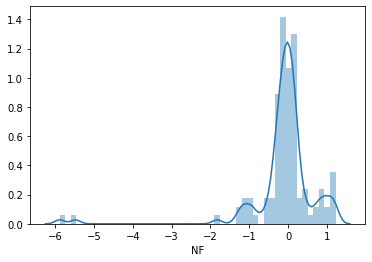

In [23]:
sns.distplot((y_test-predictions),bins=50);

# 2.5. Métricas de avaliação de regressão - X - Todas variaveis


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros 
**Mean Squared Error** (erro médio quadrático) (MSE) é a média dos erros quadrados 
**Root Mean Square Error** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados 
Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".

Todas estas são **funções de perda**, porque queremos minimizá-las.

In [24]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4454181985683663
MSE: 0.8142303097131359
RMSE: 0.9023471115447402


# 3.1. Split de treino  x2 -  # Nota 1 e Nota 2
Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. 
Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [29]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=40)

In [30]:
print(x2.shape, x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(395, 2) (276, 2) (119, 2) (276,) (119,)


# 3.2. Criando e treinando o modelo  - x2 -  # Nota 1 e Nota 2

In [31]:
lm2 = LinearRegression()

In [32]:
lm2.fit(x2_train,y2_train)

LinearRegression()

# 3.3. Avaliação modelo - x2  - # Nota 1 e Nota 2¶
Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [33]:
# Printando a intercepção. Quando y=0
print(lm2.intercept_)

-0.17290715212370156


In [34]:
coeff_df2 = pd.DataFrame(lm2.coef_, x2.columns, columns=['Coefficient'])
coeff_df2

,Coefficient
N1,0.083553
N2,0.948613


# 3.4. Predições do nosso modelo - x2 - # Nota 1 e Nota 2
Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

In [35]:
predictions2 = lm2.predict(x2_test)

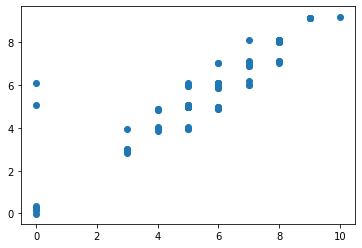

In [36]:
plt.scatter(y2_test,predictions2)

**Histograma residual**

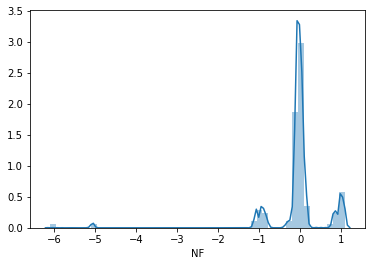

In [37]:
sns.distplot((y2_test-predictions2),bins=50);

# 3.5. Métricas de avaliação de regressão - modelo x2 - # Nota 1 e Nota 2

In [38]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 0.35650801940419485
MSE: 0.740383515875022
RMSE: 0.8604554119040813


# 4.1. Split de treino x3 - # Faltas
Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [40]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.3, random_state=40)

In [41]:
print(x3.shape, x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape)

(395, 1) (276, 1) (119, 1) (276,) (119,)


# 4.2. Criando e treinando o modelo  - x3 -  # Faltas

In [45]:
lm3 = LinearRegression()

In [46]:
lm3.fit(x3_train,y3_train)

LinearRegression()

# 4.3. Avaliação modelo - x3  - # Faltas
Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [47]:
# Printando a intercepção. Quando y=0
print(lm3.intercept_)

5.4061217757449285


In [48]:
coeff_df3 = pd.DataFrame(lm3.coef_, x3.columns, columns=['Coefficient'])
coeff_df3

,Coefficient
Faltas,0.007973


# 4.4. Predições do nosso modelo - x3 - # Faltas
Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

In [49]:
predictions3 = lm3.predict(x3_test)

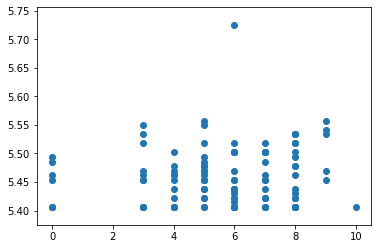

In [50]:
plt.scatter(y3_test,predictions3)

**Histograma residual**

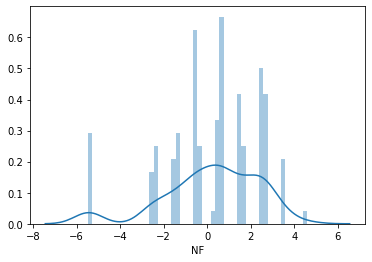

In [51]:
sns.distplot((y3_test-predictions3),bins=50);

# 4.5. Métricas de avaliação de regressão - modelo x3 - # Faltas

In [52]:
print('MAE:', metrics.mean_absolute_error(y3_test, predictions3))
print('MSE:', metrics.mean_squared_error(y3_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, predictions3)))

MAE: 1.7333038904780607
MSE: 4.774076725881046
RMSE: 2.1849660697322157


# 5.1. Split de treino x4 - # Testudo - Tempo de Estudo
Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [53]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.3, random_state=40)

In [54]:
print(x4.shape, x4_train.shape, x4_test.shape, y4_train.shape, y4_test.shape)

(395, 1) (276, 1) (119, 1) (276,) (119,)


# 5.2. Criando e treinando o modelo  - x4 - # Testudo - Tempo de Estudo

In [55]:
lm4 = LinearRegression()

In [56]:
lm4.fit(x4_train,y4_train)

LinearRegression()

# 5.3. Avaliação modelo - x4 - # Testudo - Tempo de Estudo
Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [57]:
# Printando a intercepção. Quando y=0
print(lm4.intercept_)

5.442016517549897


In [58]:
coeff_df4 = pd.DataFrame(lm4.coef_, x4.columns, columns=['Coefficient'])
coeff_df4

,Coefficient
Testudo,0.015633


# 5.4. Predições do nosso modelo - x4 - # Testudo - Tempo de Estudo
Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

In [59]:
predictions4 = lm4.predict(x4_test)

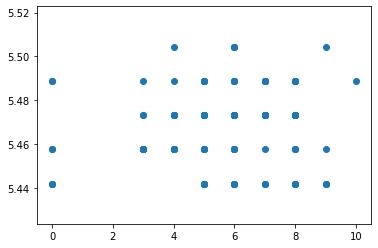

In [60]:
plt.scatter(y4_test,predictions4)

**Histograma residual**

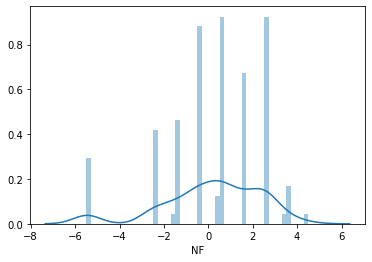

In [61]:
sns.distplot((y4_test-predictions4),bins=50);

# 5.5. Métricas de avaliação de regressão - modelo x4 - #  Tempo de Estudo

In [62]:
print('MAE:', metrics.mean_absolute_error(y4_test, predictions4))
print('MSE:', metrics.mean_squared_error(y4_test, predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, predictions4)))

MAE: 1.7304998393025488
MSE: 4.777409625390603
RMSE: 2.1857286257425925
